<a href="https://colab.research.google.com/github/tazdikhossain/Credit-Card-Fraud-Analysis-logistic-Regression-/blob/main/Credit_Card_Fraud_Analysis(logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv #Kaggle data

--2023-11-19 15:49:42--  https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/18vhxydhoe3g84n/creditcard%202.csv [following]
--2023-11-19 15:49:43--  https://www.dropbox.com/s/raw/18vhxydhoe3g84n/creditcard%202.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd7ab84ab25378e4ca73964da6d.dl.dropboxusercontent.com/cd/0/inline/CH2Ruj9FWu1yPy8uPlWJ2S_7tDsnbrPOSdvyTH85gDe3g8GjPgYD06nXvNkLjYwAIOuDW3dkrdyaCPwJ9txNdM_MfzPU2-aOjMrz121Cu-Xkc26exHMR1I3eoZ4sNmNnOfn8EgeHYUWHznn1wz4ElBZF/file# [following]
--2023-11-19 15:49:43--  https://ucd7ab84ab25378e4ca73964da6d.dl.dropboxusercontent.com/cd/0/inline/CH2Ruj9FWu1yPy8uPlWJ2S_7tDsnbrPOSdvyTH85gDe3g8GjPgYD06nXvNkLjYwAIOuDW3dkrdyaCPwJ9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/creditcard 2.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
data.describe()

In [ ]:
data[['Amount','Time','Class']].describe()

In [ ]:
data.isna().any() #Missing value

In [ ]:
# Manual Check

null_columns=pd.DataFrame({'Columns':data.isna().sum().index, 'No. Null Values':data.isna().sum().values,'Percentage':data.isna().sum().values/data.shape[0]})

In [ ]:
null_columns

In [ ]:
data.tail(10)

In [ ]:
# Percentage of total not fraud transaction
notFraud=data['Class']
nfcount=0

for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount
per_nf=(nfcount/len(notFraud))*100
print('percentage of total not found transaction in dataset:', per_nf)


percentage of total not found transaction in dataset: 99.82725143693798


In [ ]:
# Percentage of total fraud transaction

fcount=0
Fraud=data['Class']

for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount
per_f=(fcount/len(Fraud))*100
print('percentage of total found transaction in dataset:', per_f)

percentage of total found transaction in dataset: 0.1727485630620034


In [ ]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=fcount
plot_data['Genuine Transaction']=nfcount
plot_data

,Fraud Transaction,Genuine Transaction


In [ ]:
#plt.title("Bar plot for Fraud vs Genuine Transaction")
#sns.barplot(x= 'Fraud Transaction', y= 'Genuine Transaction', data_df=plot_data, palette='Blues', edgecolor='w')

In [ ]:
#plt.title("Bar plot for Fraud vs Genuine Transaction")
#sns.countplot(x= "Class",  data_df=data, palette='Blues', edgecolor='w')

Text(0.5, 1.0, 'Time vs Amount')

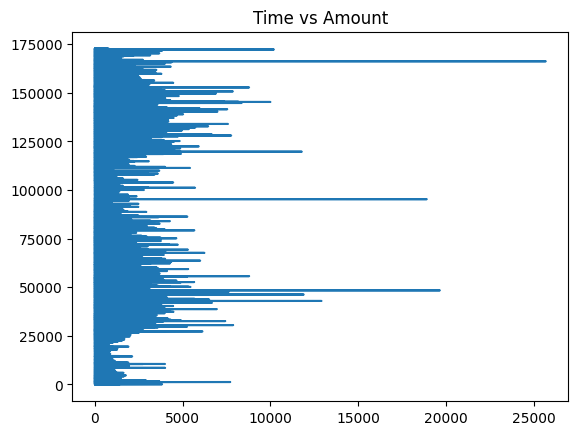

In [ ]:
x = data['Amount']
y = data['Time']
plt.plot(x,y)
plt.title('Time vs Amount')

In [ ]:
plt.figure(figsize=(10,8),)
plt.title('amount Distribution')
sns.displot(data['Amount'], color='red')

In [ ]:
# Outliners

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Amount'], data['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

In [ ]:
# Correlation matrix

correlation_metrics = data.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(correlation_metrics, vmax=.9, square = True)
plt.show()

In [ ]:
# Train & Test

x = data.drop(['Class'], axis=1) #Drop the target value
y = data['Class']
xtrain, xtest, ytrain, ytest, = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)

In [ ]:
y_pred = logisticreg.predict(xtest)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = logisticreg.score(xtest, ytest)
accuracy

0.9989817773252344

Confusion Matrix
1. Positive(P)- transaction genuine
2. negative(N) - Transaction not negative
3. True-Positive(TP)- Obsetvation positive, predictive positive
4. False-Negative(FN)- Obsetvation positive, predictive negative
5. True-Negative(TN) - Obsetvation negative, predictive negative
6. False-Positive (FP) - Obsetvation negative, predictive positive


#ACCURACY = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
cm = metrics.confusion_matrix(ytest, y_pred)
cm

array([[56836,    28],
       [   30,    68]])

In [ ]:
# Accuracy calculation
a=accuracy*100
a

99.89817773252344